In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

%matplotlib inline

In [2]:
source1 = 'dataset/ca-GrQc.txt' 
source2 = 'dataset/socfb-Swarthmore42.txt'

In [3]:
# This function is used for reading the data and creating the graph.
# source: file location
# G: Graph
def create_graph(source):
    G = nx.Graph()
    with open(source) as file:
        lines = file.readlines()
        for line in lines:
            nodes = line.split()
            G.add_edge(nodes[0], nodes[1])
    return G

In [4]:
# This function is used to plot graph
# G: Graph
def plot_graph(G):
    colors = np.linspace(0, 1, len(G.nodes))

    fig = plt.figure(figsize=(10, 10))
    nx.draw(G,
            node_size = 30,
            node_color = colors,
            pos = nx.kamada_kawai_layout(G), 
            edge_color = 'g')
    fig.set_facecolor('k')

In [5]:
G1 = create_graph(source1)
G2 = create_graph(source2)

#### Options for visualization Graphviz, Grphi

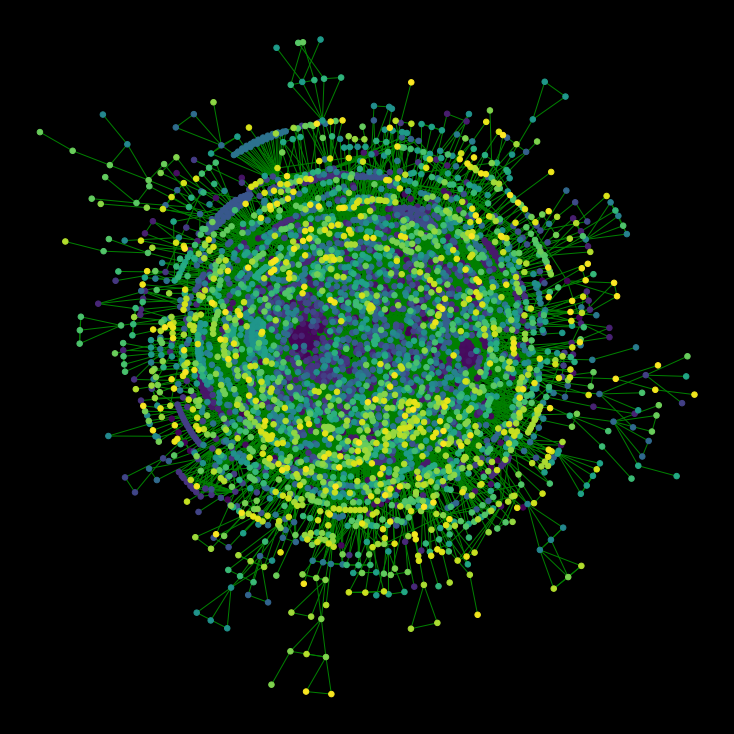

In [7]:
plot_graph(G1)

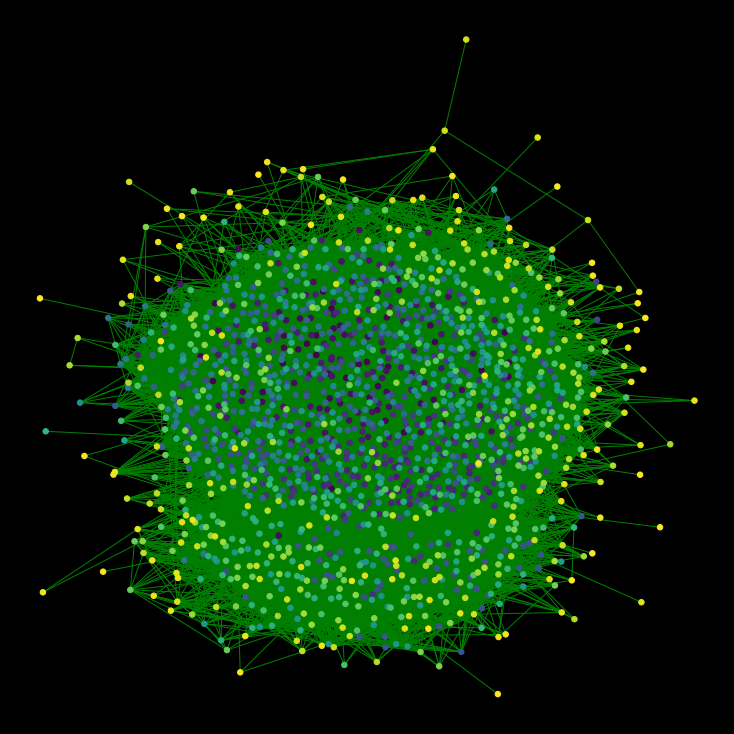

In [6]:
plot_graph(G2)

#### Graph Adjacency Matrix

In [52]:
# This function is used to show adjacency matrix
# G: Graph
# ax: for show adjacency matrix
# title: title of the adjacency matrix 
def show_adjacency_matrix(G, ax, title):
    A = nx.to_numpy_matrix(G, dtype=np.bool)
    
    ax.set_title(title)
    ax.imshow(A, cmap="Greys", interpolation="none")

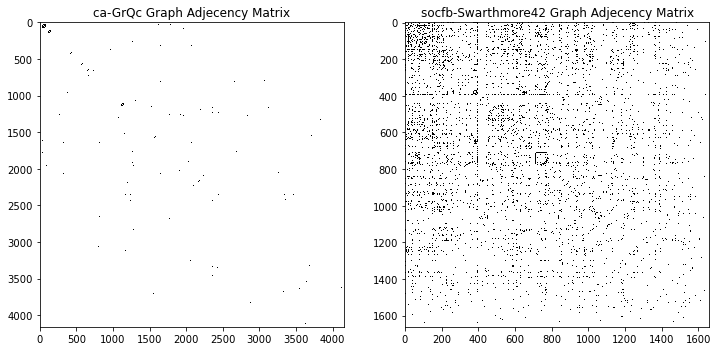

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))
show_adjacency_matrix(G1, ax1, 'ca-GrQc Graph Adjecency Matrix')
show_adjacency_matrix(G2, ax2, 'socfb-Swarthmore42 Graph Adjecency Matrix')

#### Graphs Node - Edge Count

In [54]:
print('ca-GrQc Graph Node Count: {}, Edge Count: {}'.format(G1.number_of_nodes(), G1.number_of_edges()))
print('socfb-Swarthmore42 Graph Node Count: {}, Edge Count: {}'.format(G2.number_of_nodes(), G2.number_of_edges()))

ca-GrQc Graph Node Count: 4158, Edge Count: 13422
socfb-Swarthmore42 Graph Node Count: 1661, Edge Count: 61052


#### Graph Degree Distribution

In [78]:
# This function is used to plot degree distribution
# G: Graph
# ax: for show adjacency matrix
# title: title of the degree distribution
def plot_degree_dist(G, ax, title):
    degree_frequency = nx.degree_histogram(G)
    degrees = range(len(degree_frequency))
    ax.loglog(degrees[:], degree_frequency[:], 'go-') 
    ax.set_title(title)
    ax.set_xlabel('Degree')
    ax.set_ylabel('Number of nodes')

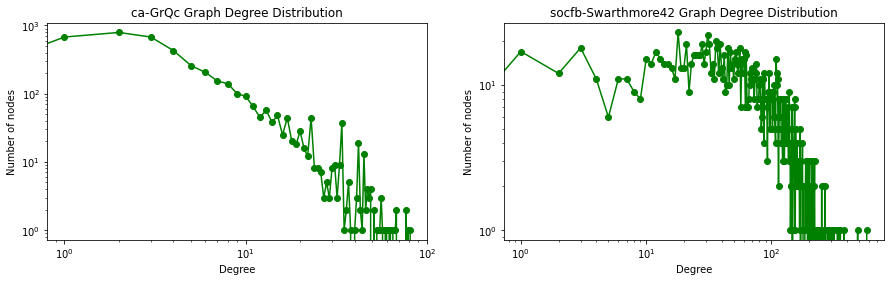

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
plot_degree_dist(G1, ax1, 'ca-GrQc Graph Degree Distribution')
plot_degree_dist(G2, ax2, 'socfb-Swarthmore42 Graph Degree Distribution')